# Бутстрап  
Бутстрап это метод, позволяющий проверять гипотезы за счет повторных выборок.  
Мы можем оценить любой параметр выборки(среднее, медиану, квантиль итд) построив эмпирическое распределение параметра.  
Он не чувствителен к разным распределениям, но его основной недостаток - скорость


In [17]:
# импортируем библиотеки 

import pandas as pd
import numpy as np
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [18]:
df = pd.read_csv('/home/borislav/Загрузки/hw_bootstrap.csv', sep = ';', index_col = 'Unnamed: 0')
df.head()

,value,experimentVariant
1,"10,3804953740268",Control
2,"9,54686666784264",Control
3,"11,0882146509904",Control
4,"10,1472740570122",Control
5,"9,78980767524929",Control


In [19]:
# Причешем колонку value
df.value = df.value.str.replace(',', '.').astype('float')

In [20]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # Применим статитсику mean
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

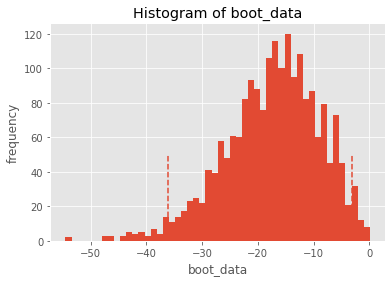

In [23]:
booted_data = get_bootstrap(df[df['experimentVariant'] == 'Control'].value,df[df['experimentVariant'] == 'Treatment'].value, boot_it = 2000)

In [24]:
booted_data["p_value"]

booted_data["ci"]

,0
0.025,-36.166645
0.975,-3.033637
